# About Dataset
The dataset captures the user behaviours of a banking mobile app. It allows us to see the date and time of app installation, as well as the features the users engaged with within the app. App behaviour is characterised as the list of app screens the user looked at, and whether the user played the financial mini-games available.

The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trial is over.

### The dataset consists of the following files: 

1. Above mentioned Dataset is stored in file - "appdata10.csv"
2. The list of top screen used by user to reduce number of feature is recorded in file - "top_screens.csv"

# 1. Preliminary exploration

This stage consists of the followin steps: 
1. Load the dataset
2. Get the shape of the dataset and chck whether all the data types are in line with common senses.  
3. Check any null values. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv("../data/raw/appdata10.csv")
display(data.shape)
display(data.isna().sum())
display(data.info())
data.head(5)

(50000, 12)

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


None

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


# 2. Understanding the dataset 

We will further explore each column and get a better understanding. 

In [68]:
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(include='object')

### First, let's split the columns, check their correlations, and plot the distrubution charts. 

In [69]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0


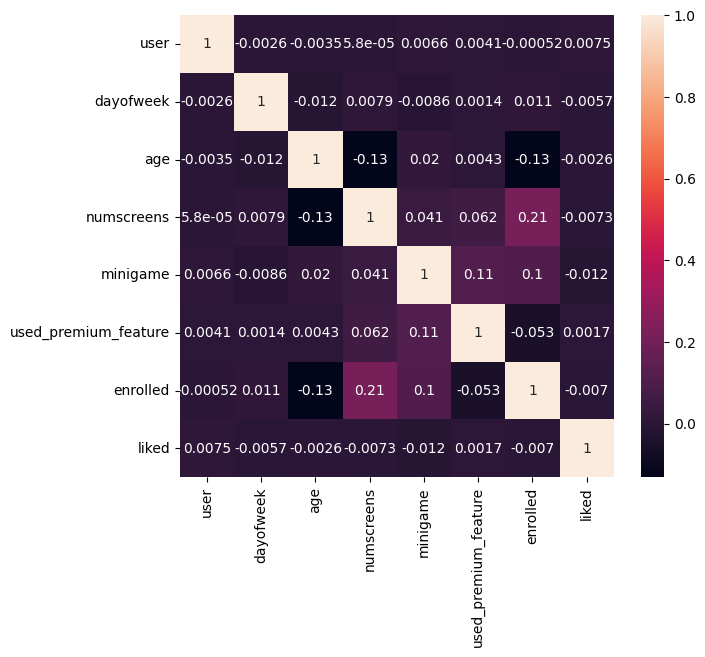

In [70]:
fig,ax = plt.subplots(figsize=(7,6))
sns.heatmap(data_num.corr(),annot=True)
plt.show()

### Secondly, we will split the numerical datas by continous and discrete. 

In [71]:
def con_dis_split(df, thr=36):
    con = []
    dis = []
    for i in range(df.shape[1]):
        if df.iloc[:,i].unique().size >=thr: 
            con.append(i)
        else: 
            dis.append(i)
    return df.iloc[:,con],df.iloc[:, dis]

In [72]:
data_num_con,data_num_dis = con_dis_split(data_num)
display(data_num_con.head())
data_num_dis.head()

,user,age,numscreens
0,235136,23,15
1,333588,24,13
2,254414,23,3
3,234192,28,40
4,51549,31,32


,dayofweek,minigame,used_premium_feature,enrolled,liked
0,3,0,0,0,0
1,6,0,0,0,0
2,1,0,1,0,1
3,4,0,0,1,0
4,1,0,0,1,1


In [73]:
def histplot_df(df):
    for i in range(0,df.shape[1]):
        sns.histplot(x=df.iloc[:,i])
        plt.show()
        
def countplot_df(df):
    for i in range(0,df.shape[1]):
        unique_values = df.iloc[:,i].unique().size
        if (unique_values <= 6):
            sns.countplot(x=df.iloc[:,i], order=df.iloc[:,i].value_counts().index)
        else:
            sns.countplot(y=df.iloc[:,i], order=df.iloc[:,i].value_counts().index)
        plt.show()

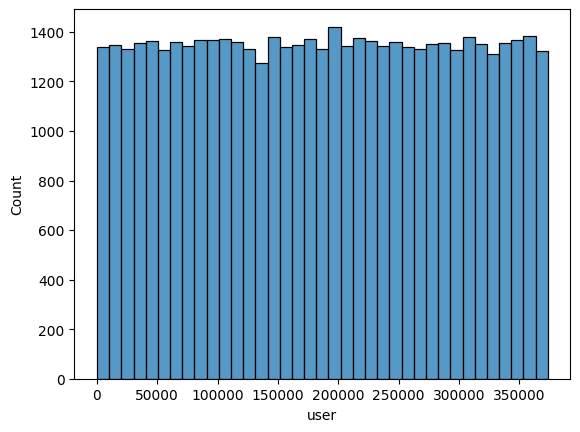

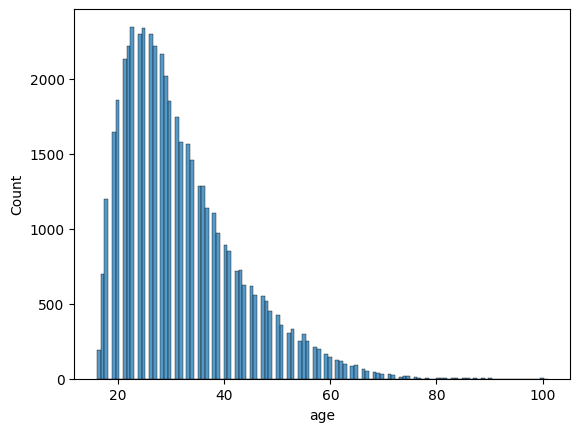

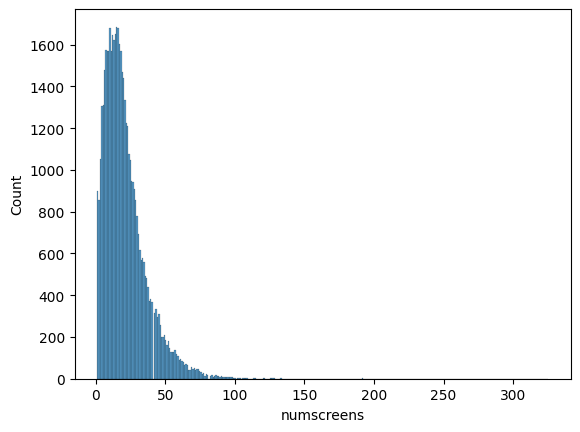

In [74]:
histplot_df(data_num_con)

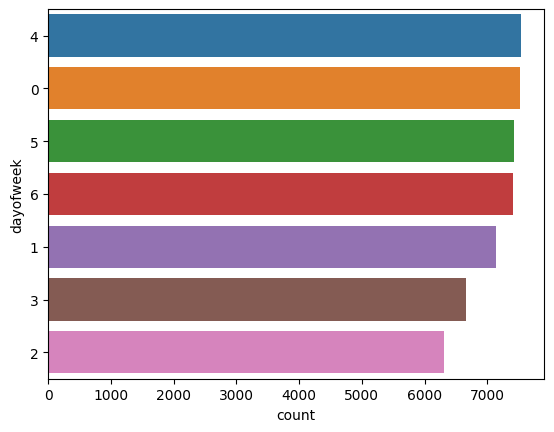

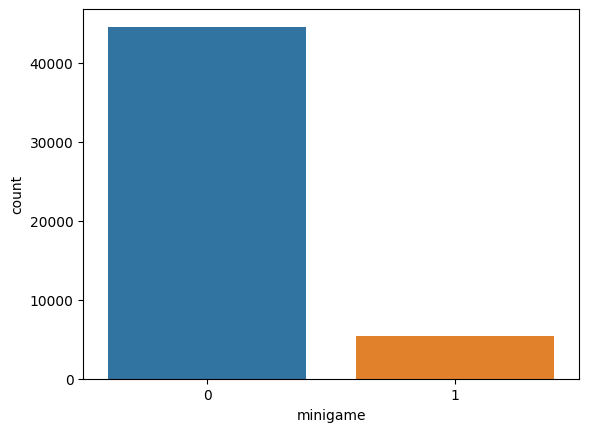

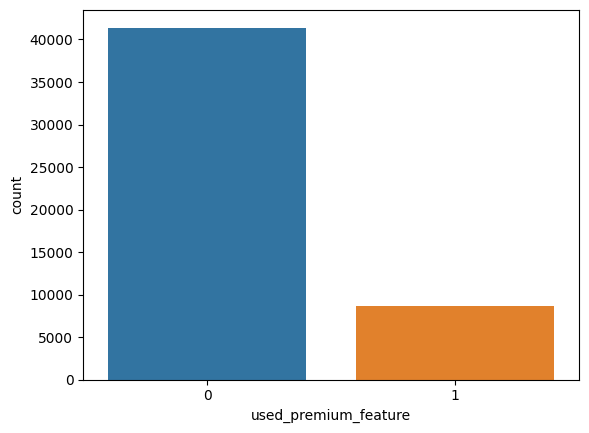

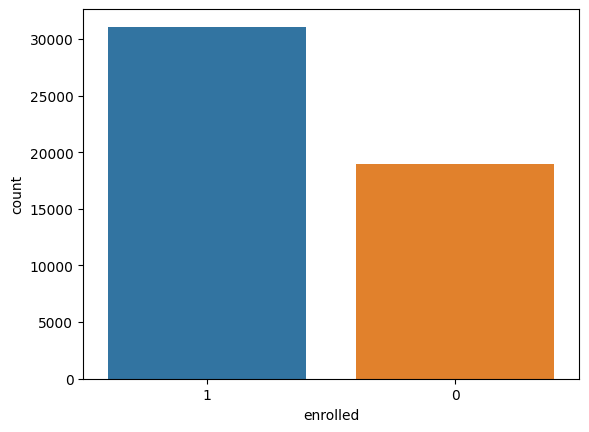

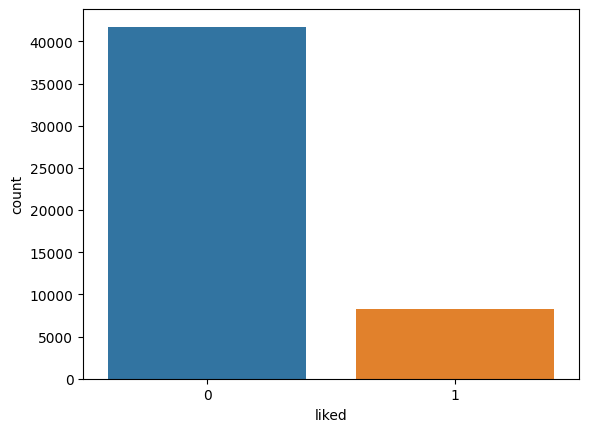

In [75]:
countplot_df(data_num_dis)

# 3. Data Process: pre-stage

Before we process the data, we can see that some data types are not correctly computed and some data types can be further refined. So we will change the data type and create some new columns if necessary before we apply any transformer and scalers. 

In [76]:
data_cat.nunique()

first_open       49747
hour                24
screen_list      38799
enrolled_date    31001
dtype: int64

### In the categorical dataset, 3 columns should be computed as date format not as object. So we will create a new dataset with all the time information for a further exploration.  

In [106]:
df_time = pd.DataFrame(columns=['user','first_open_date','first_open_hours','first_open_month','first_open_year','enrolled_date','enrolled_hour','weekend_check'])

In [108]:
def weekend_check(x):
    if x == 0 or x == 6:
        x = 'Weekend'
    else: 
        x = 'Weekday'
    return x

In [120]:
data2_cat=data_cat.copy()

data2_cat['first_open'] = pd.to_datetime(data2_cat['first_open'])
data2_cat['enrolled_date'] = pd.to_datetime(data2_cat['enrolled_date'])

display(data2_cat.head())

df_time['user'] = data['user'] 
df_time['first_open_date'] = data2_cat['first_open'].dt.strftime("%Y-%m-%d")
df_time['first_open_hours'] = data2_cat['first_open'].dt.strftime('%H')
df_time['first_open_month'] = data2_cat['first_open'].dt.strftime('%m')
df_time['first_open_year'] = data2_cat['first_open'].dt.strftime('%Y')
df_time['enrolled_date'] = data2_cat['enrolled_date'].dt.strftime('%Y-%m-%d')
df_time['enrolled_hour'] = data2_cat['enrolled_date'].dt.strftime('%H')
df_time['weekend_check'] = data['dayofweek']
df_time['weekend_check'] = df_time['weekend_check'].apply(weekend_check)

df_time.head()

,first_open,hour,screen_list,enrolled_date
0,2012-12-27 02:14:51.273,02:00:00,"idscreen,joinscreen,Cycle,product_review,ScanP...",NaT
1,2012-12-02 01:16:00.905,01:00:00,"joinscreen,product_review,product_review2,Scan...",NaT
2,2013-03-19 19:19:09.157,19:00:00,"Splash,Cycle,Loan",NaT
3,2013-07-05 16:08:46.354,16:00:00,"product_review,Home,product_review,Loan3,Finan...",2013-07-05 16:11:49.513
4,2013-02-26 18:50:48.661,18:00:00,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",2013-02-26 18:56:37.841


,user,first_open_date,first_open_hours,first_open_month,first_open_year,enrolled_date,enrolled_hour,weekend_check
0,235136,2012-12-27,02,12,2012,NaN,NaN,Weekday
1,333588,2012-12-02,01,12,2012,NaN,NaN,Weekend
2,254414,2013-03-19,19,03,2013,NaN,NaN,Weekday
3,234192,2013-07-05,16,07,2013,2013-07-05,16,Weekday
4,51549,2013-02-26,18,02,2013,2013-02-26,18,Weekday


### After doing some clean-up and creating a new dataframe containing all time information, we will run a few aggregations and get some initial insights. 

In [98]:
month_year_user = df_time.groupby(['first_open_year','first_open_month']).agg({'user':'count'})

display(month_year_user)

user
first_open_year first_open_month      
2012            11                 937
                12                5046
2013            01                5884
                02                6770
                03                6324
                04                6268
                05                8143
                06                8123
                07                2505

### Since no months have been doubled, we can directly compare each month. From Nov 2012 to July 2013, May is the buiest month, followed by June and February. Overall speaking, Q2 2013 has received the highest number of free-trial registrations. 

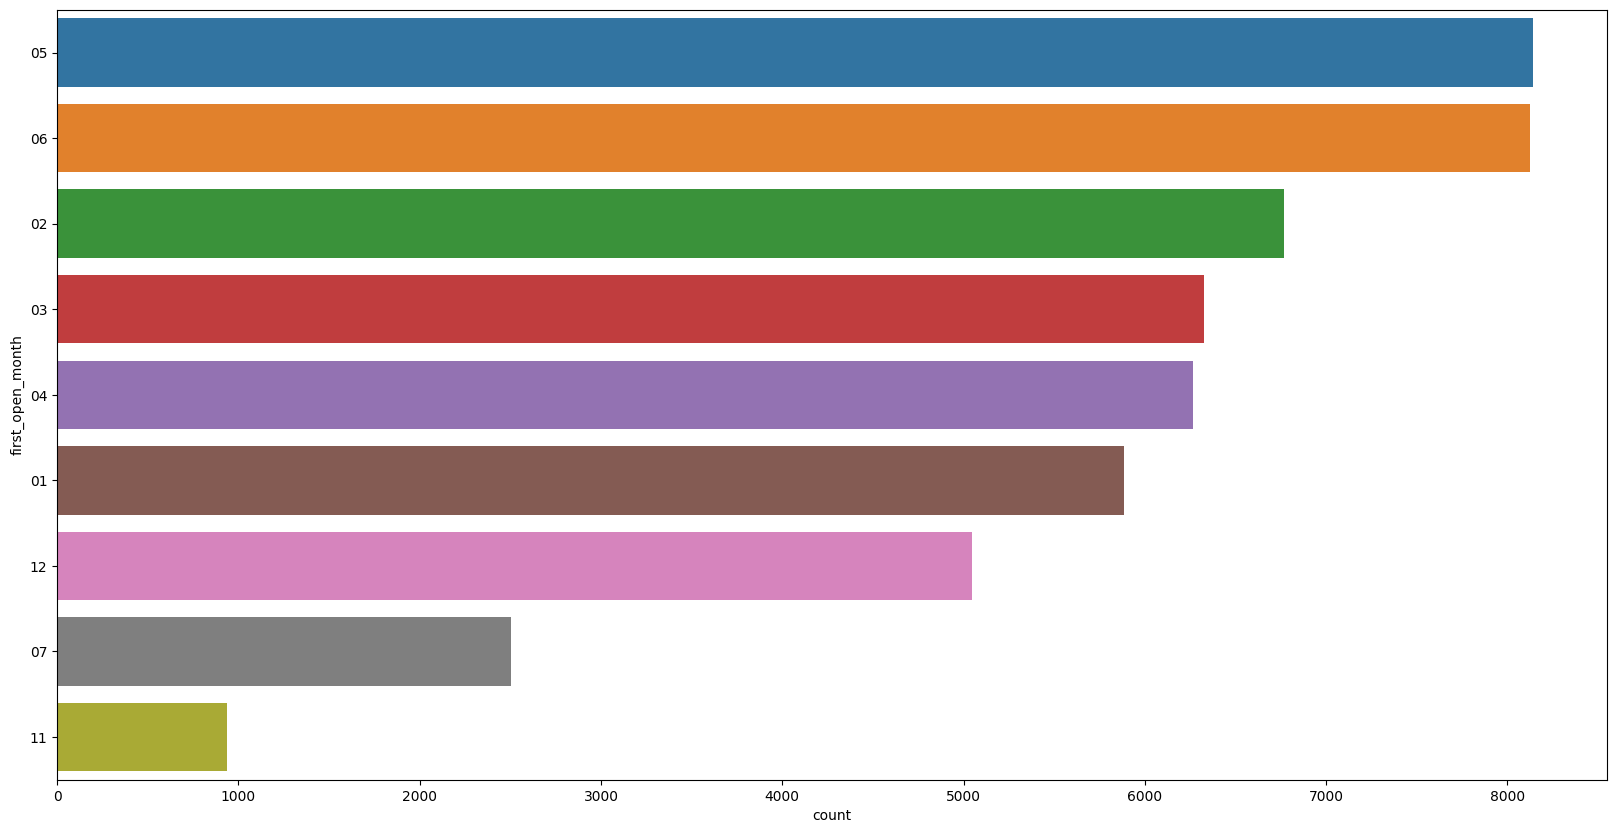

In [99]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df_time,y='first_open_month',order=df_time['first_open_month'].value_counts().index)
plt.show()

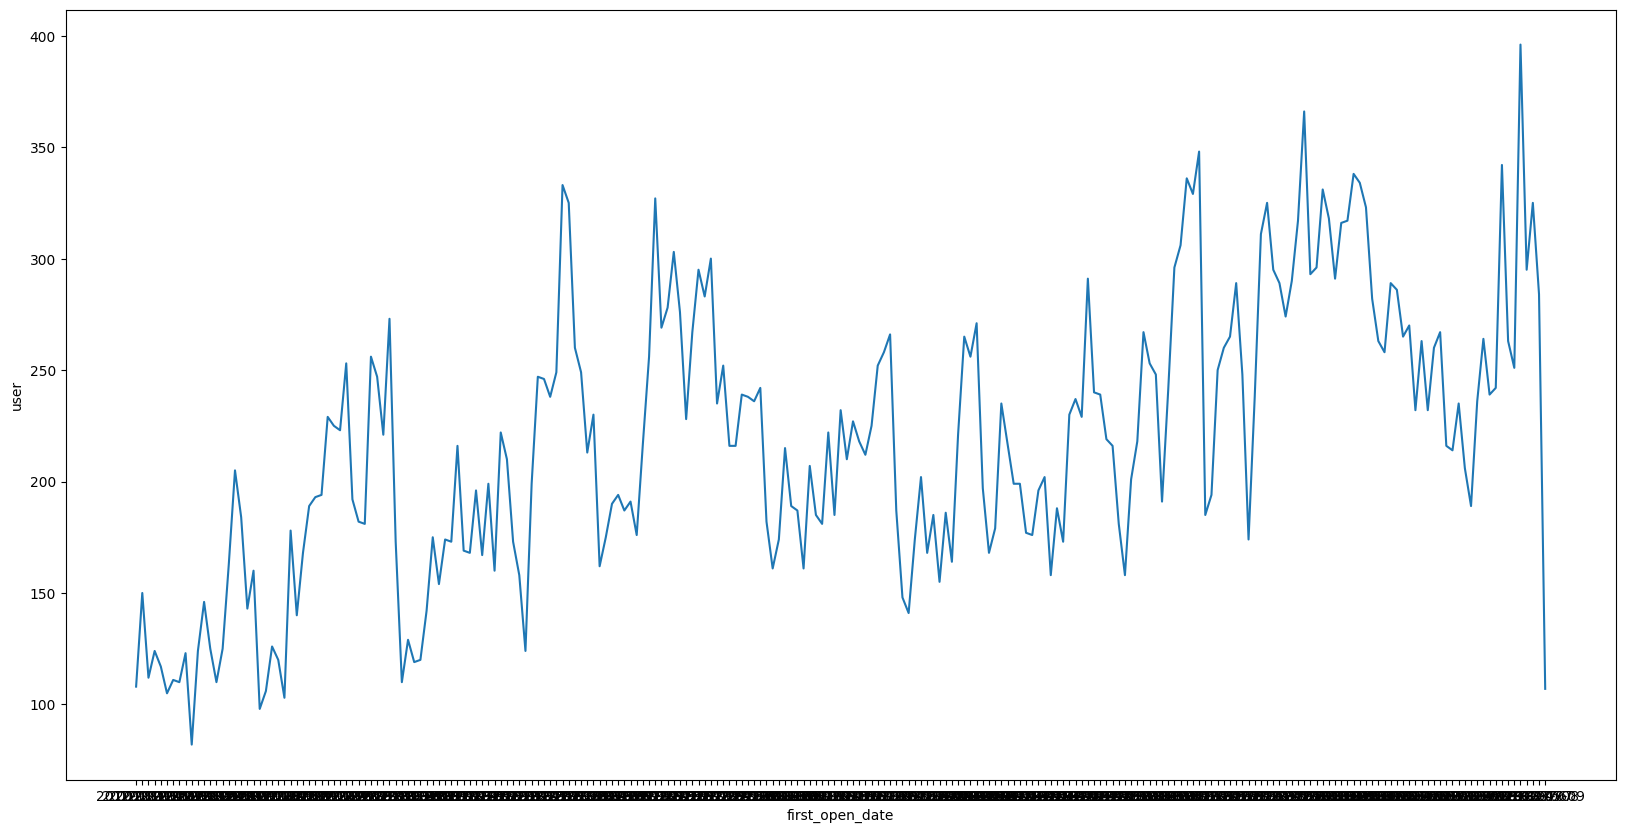

In [97]:
date_user = month_year_user = df_time.groupby('first_open_date').agg({'user':'count'})

fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=date_user, x='first_open_date',y='user')
plt.show()

### By the lineplots, one can tell that the peak of sign-ups and enrollment are both around late afternoon and the whole evening. 

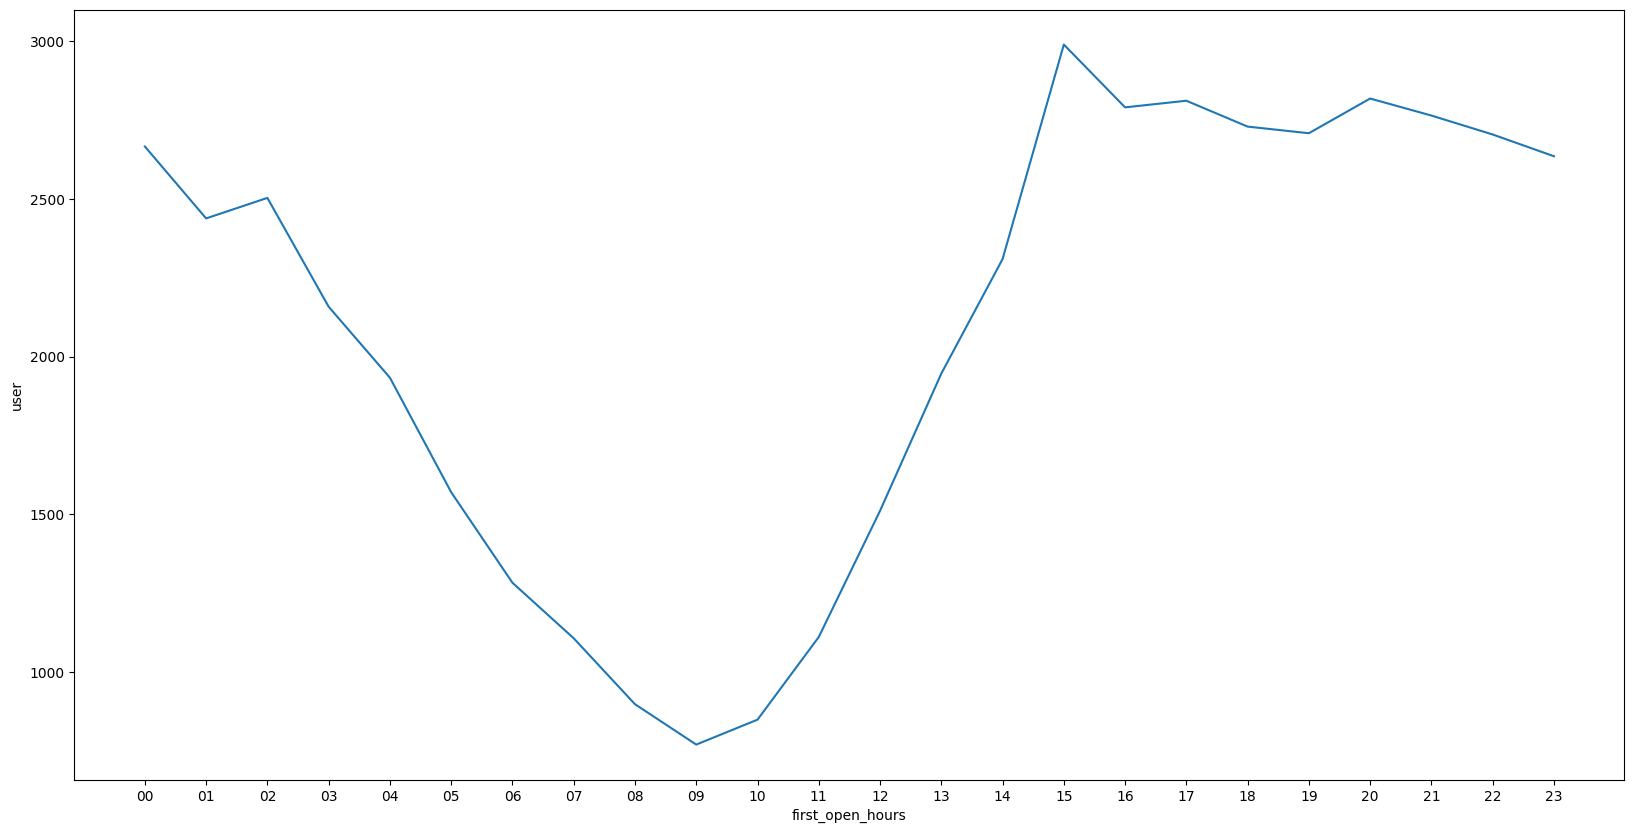

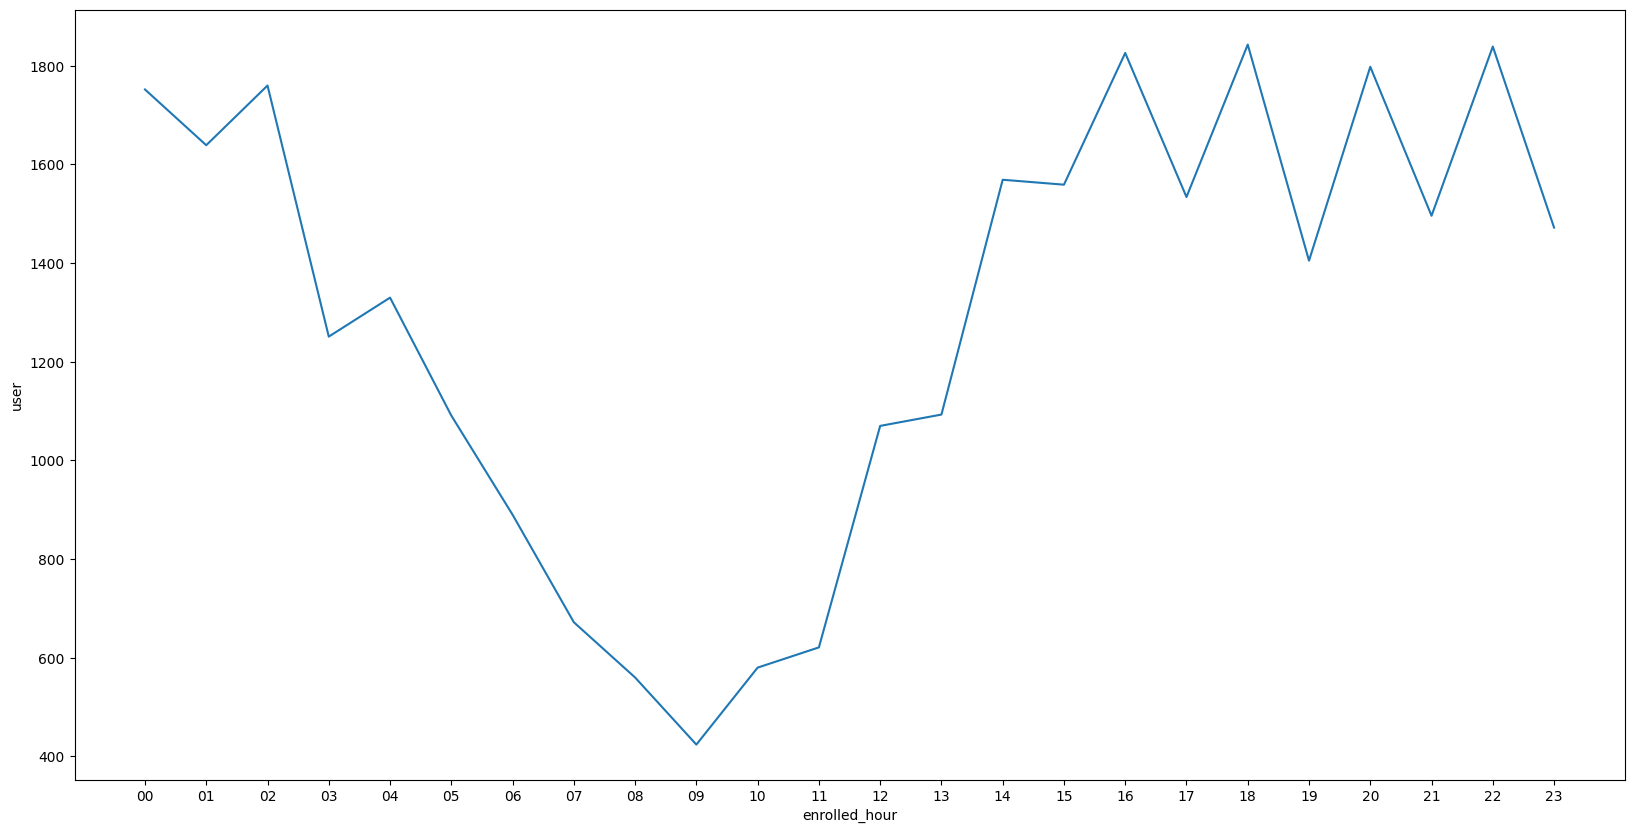

In [121]:
hour_user = df_time.groupby('first_open_hours').agg({'user':'count'})
hour_enrolled = df_time.groupby('enrolled_hour').agg({'user':'count'})

fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=hour_user, y='user',x='first_open_hours')
plt.show()

fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=hour_enrolled, y='user',x='enrolled_hour')
plt.show()

### After exploring the time, we will concatenate this dataframe back to the original data.

In [102]:
display(df_time.head())
data.head(5)

,user,first_open_date,first_open_hours,first_open_month,enrolled_date,first_open_year
0,235136,2012-12-27,02:00:00,12,NaN,2012
1,333588,2012-12-02,01:00:00,12,NaN,2012
2,254414,2013-03-19,19:00:00,03,NaN,2013
3,234192,2013-07-05,16:00:00,07,2013-07-05,2013
4,51549,2013-02-26,18:00:00,02,2013-02-26,2013


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
data = data.drop(columns=['first_open'])